In [5]:
import pandas as pd
from plotnine import *
import numpy as np

# Combining endogenous DNA with sourcepredict

In [2]:
d = pd.read_csv("../../data/coproID_result.csv", index_col=0)

In [7]:
d['endo_pred'] = np.where(d['normalized_bp_proportion_aligned_Homo_sapiens'] > d['normalized_bp_proportion_aligned_Canis_familiaris'], 'Homo sapiens', 'Canis familiaris')

In [14]:
d.head()

,normalized_bp_proportion_aligned_Homo_sapiens,normalized_bp_proportion_aligned_Canis_familiaris,metagenomic_proportion_Homo_sapiens,metagenomic_proportion_Canis_familiaris,coproID_proba_Homo_sapiens,coproID_proba_Canis_familiaris,endo_pred,sourcepredict_pred,consensus
AHP001_A0101_SG1_1_S0,0.001732,0.998268,0.017157,0.036073,0.000030,0.036010,Canis familiaris,Canis familiaris,1
AHP001_B0101_SG1_1_S0,0.001784,0.998216,0.029145,0.061278,0.000052,0.061168,Canis familiaris,Canis familiaris,1
AHP002_A0101_SG1_1_S0,0.003693,0.996307,0.022543,0.047396,0.000083,0.047221,Canis familiaris,Canis familiaris,1
AHP002_B0101_SG1_1_S0,0.000740,0.999260,0.022181,0.046637,0.000016,0.046602,Canis familiaris,Canis familiaris,1
AHP003_A0101_SG1_1_S0,0.003601,0.996399,0.019724,0.041471,0.000071,0.041322,Canis familiaris,Canis familiaris,1


In [9]:
d['sourcepredict_pred'] = np.where(d['metagenomic_proportion_Homo_sapiens'] > d['metagenomic_proportion_Canis_familiaris'], 'Homo sapiens', 'Canis familiaris' )

In [11]:
d['consensus'] = np.where(d['endo_pred'] == d['sourcepredict_pred'], 1, 0)

In [19]:
d['cateregorical_consensus'] = np.where(d['endo_pred'] == d['sourcepredict_pred'], 'consensus', 'no consensus')

## Which proportion of the samples are predicted identical by both Endogenous DNA and Sourcepredict ?

In [13]:
d['consensus'].sum()/d['consensus'].count()*100

83.33333333333334

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: results/figure5.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


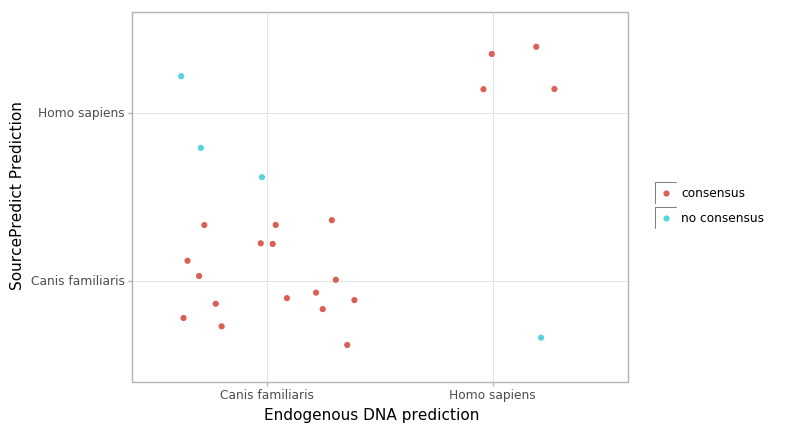

<ggplot: (8771599355645)>

In [60]:
p = ggplot(d, aes('endo_pred','sourcepredict_pred')) + geom_jitter(aes(color="cateregorical_consensus"))
p = p + theme_light() + labs(x='Endogenous DNA prediction',y = 'SourcePredict Prediction')
p = p + scale_colour_discrete(name=' ')
p.save("results/figure5.png", dpi=300)
p